<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/Temperature_Spread_Regularizarion_normal%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("2023_one hours__normal_on_state.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,Gt Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.0,5.243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.518,20.101,20.219,20.236,20.529,20.190,20.357,20.727,20.528,20.424
2023-01-01 01:00:00,0.0,5.237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.763,19.968,20.167,20.189,20.478,20.359,20.230,20.527,20.495,20.395
2023-01-01 02:00:00,0.0,5.231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.797,20.256,19.731,20.277,20.648,20.563,20.118,20.656,20.576,20.778
2023-01-01 03:00:00,0.0,5.243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.931,20.413,20.159,20.230,20.318,20.303,20.153,20.395,20.494,20.429
2023-01-01 04:00:00,0.0,5.243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.696,20.035,20.040,20.233,20.607,20.218,20.301,20.518,20.350,20.703


In [8]:
data.tail()

,Gt Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-10-29 20:00:00,627.254,2998.286,13.206,214.829,26.462,87.990,1253.733,31.251,33.656,83.951,...,630.019,627.262,612.782,610.185,632.697,628.726,638.796,629.555,622.468,630.057
2023-10-29 21:00:00,627.054,2997.869,13.288,216.627,26.232,87.984,1255.249,29.385,33.780,84.081,...,628.844,626.230,613.153,609.790,633.529,628.954,640.118,630.300,622.481,631.250
2023-10-29 22:00:00,623.723,3001.700,13.273,216.795,25.943,88.004,1252.697,28.859,33.896,84.335,...,625.089,624.296,609.799,606.911,631.486,626.173,635.994,627.009,619.739,626.640
2023-10-29 23:00:00,0.000,306.057,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,250.871,243.850,237.624,245.893,244.070,241.351,251.092,250.009,244.186,246.044
2023-10-30 00:00:00,0.000,5.249,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,306.830,307.266,312.763,318.519,322.476,325.551,332.690,335.100,337.625,335.548


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5953 entries, 2023-01-01 00:00:00 to 2023-10-30 00:00:00
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gt Exhaust Outlet Temp           5953 non-null   float64
 1   Turbine Speed In RPM             5953 non-null   float64
 2   GT Fuel Gas Mass Flow            5953 non-null   float64
 3   GT Gross MW                      5953 non-null   float64
 4   GT Compres Inlet Temp            5953 non-null   float64
 5   GT IGV Position                  5953 non-null   float64
 6   GT Turbine Inlet Temperature     5953 non-null   float64
 7   GT Swirl Angle                   5953 non-null   float64
 8   GT Efficiency Actual (LHV)       5953 non-null   float64
 9   GT (Expander) Efficiency         5953 non-null   float64
 10  Combust Monitor Actual Spread 2  5953 non-null   float64
 11  GT Compres Inlet Press           5953 non-null

<Axes: >

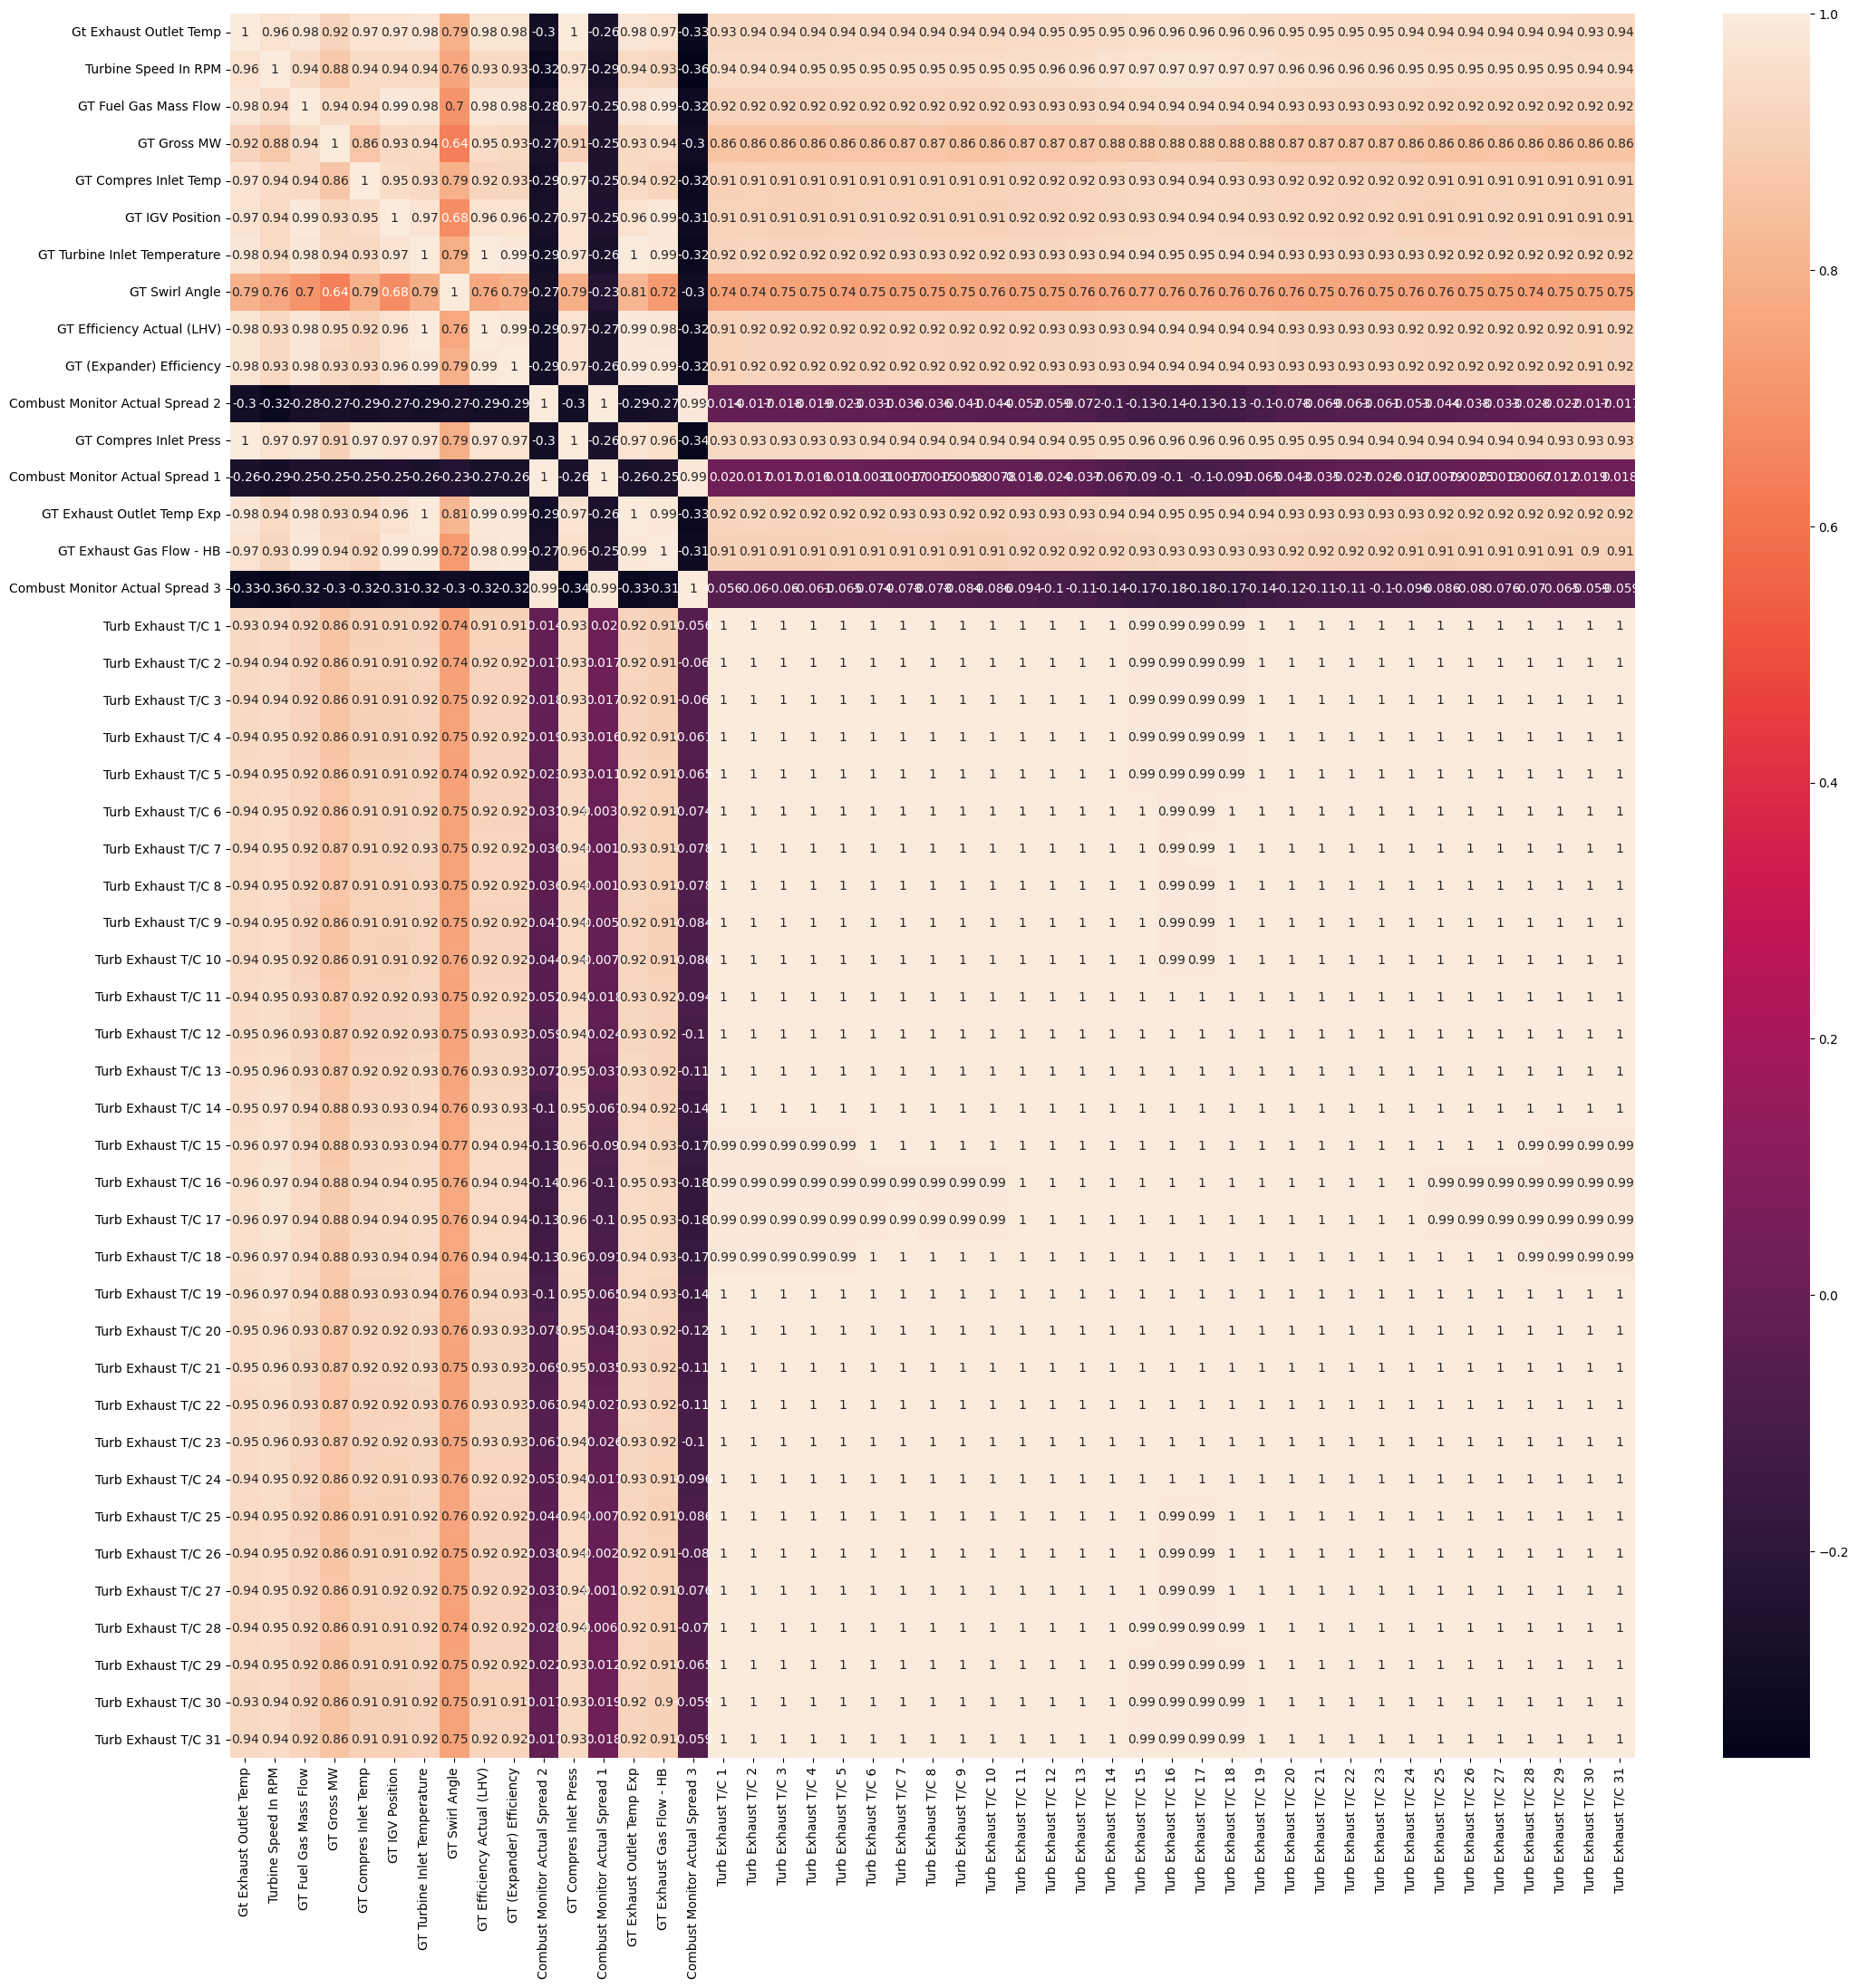

In [10]:
fig, ax = plt.subplots(figsize=(25,25))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Comment above: It is hard to see the number of correction for each features

In [11]:
#print("Slewness in Column: Combust Monitor Actual Spread 1", data["Combust Monitor Actual Spread 1"].skew)

#plt.hist(data["Combust Monitor Actual Spread 1"])
#plt.show()

Normal disctribustion can be used for the

In [12]:
#from scipy import stats

#col_cox , lam = stats.boxcox(data["Combust Monitor Actual Spread 1"])[0:2]
#print("Skewness in Column : Sqrt Combust Monitor Actual Spread 1s " ,pd.Series(col_cox).skew())

#plt.hist(col_cox)
#plt.show()

In [13]:
#data["Combust Monitor Actual Spread 1"] = col_cox

In [14]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [15]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [16]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [17]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [18]:
Xtrain.shape , Xtest.shape

((4762, 46), (1191, 46))

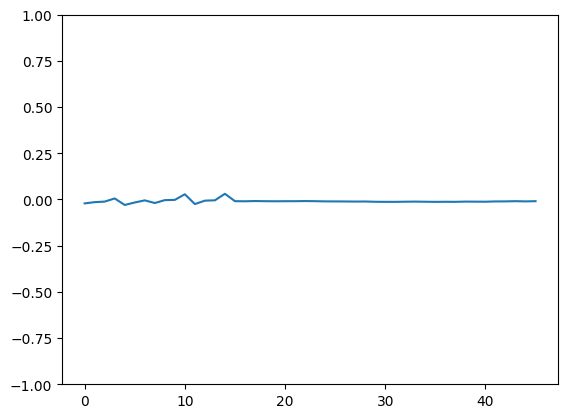

In [19]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

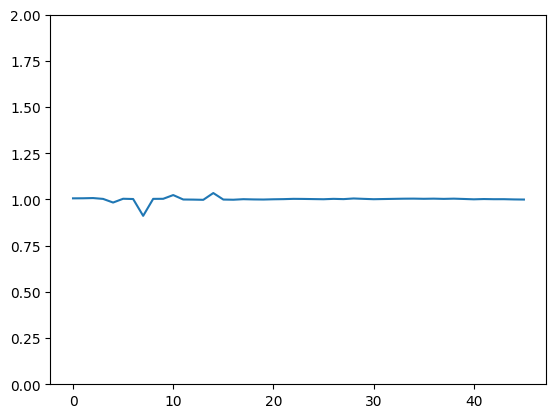

In [20]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [21]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [22]:
model_linear = LinearRegression()
model_linear.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_linear.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_linear.score(Xtest , Ytest))

 Training Accuracy :  0.9957046953390373
 Testing Accuracy :  0.9957435763522671


Text(0, 0.5, 'Importance')

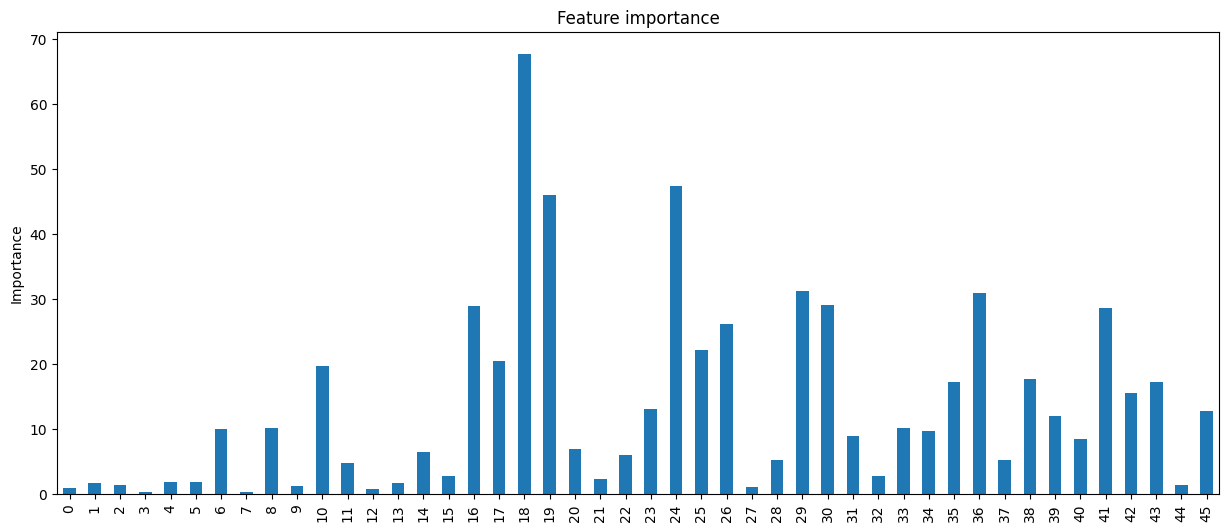

In [23]:
# Let's now plot the feature's importance
# according to the linear model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_linear.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [24]:
# if the data set has less number of features and the features have less correlations among themselves
model_ridge = Ridge()
model_ridge.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_ridge.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_ridge.score(Xtest , Ytest))

 Training Accuracy :  0.9952601447301059
 Testing Accuracy :  0.9953385245268553


Text(0, 0.5, 'Importance')

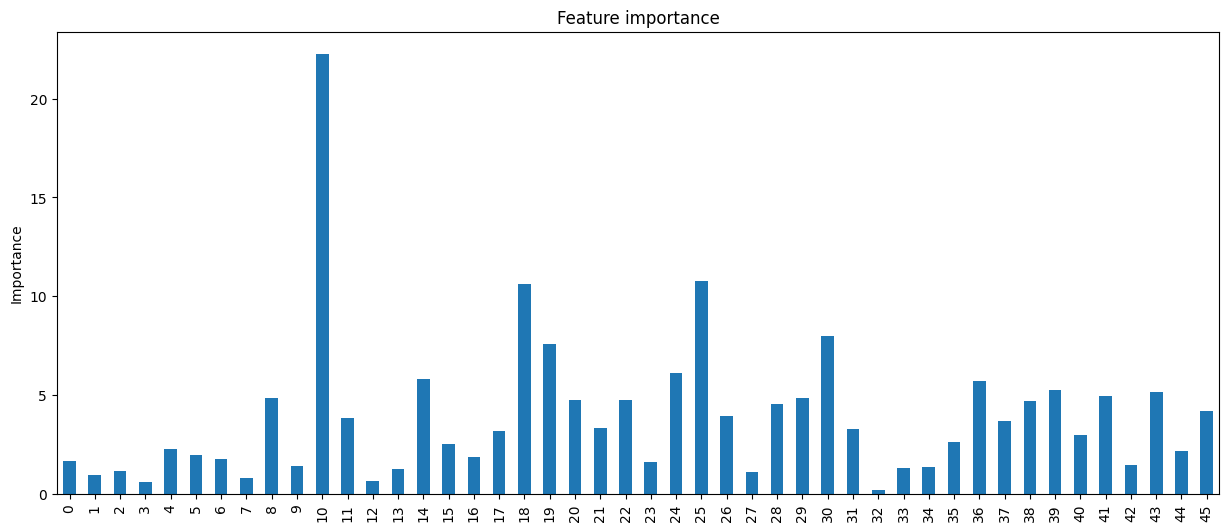

In [25]:
# Let's now plot the feature's importance
# according to the Ridge model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_ridge.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [26]:
# Using Lasso the weight of few features will become zero. this will lead data loss
model_lasso = Lasso()
model_lasso.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_lasso.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_lasso.score(Xtest , Ytest))

 Training Accuracy :  0.9895484274930415
 Testing Accuracy :  0.9901778108716462


Text(0, 0.5, 'Importance')

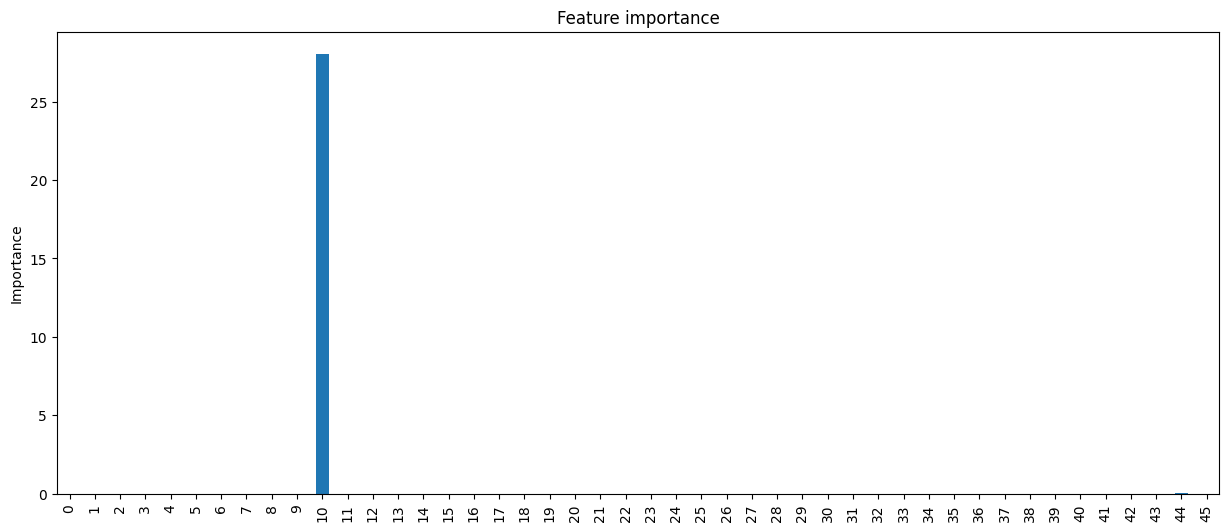

In [27]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_lasso.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [28]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model_elasticnet = ElasticNet()
model_elasticnet.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_elasticnet.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_elasticnet.score(Xtest , Ytest))

 Training Accuracy :  0.950437782164443
 Testing Accuracy :  0.9519585363436107


Text(0, 0.5, 'Importance')

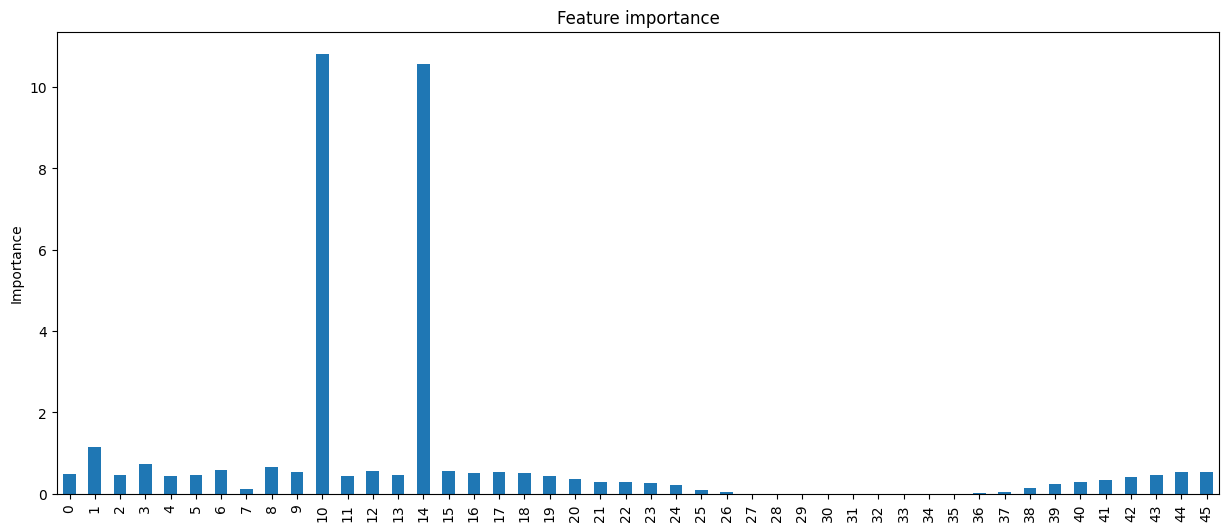

In [29]:
# Let's now plot the feature's importance
# according to the Elastic model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_elasticnet.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

Changing Parameter for Lasso and ElasticNet

In [30]:
model_Lasso_alpha = Lasso(alpha = 0.01)
model_Lasso_alpha.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_Lasso_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_Lasso_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.9946149452772644
 Testing Accuracy :  0.9946574127009834


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.772e+02, tolerance: 4.060e+02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Importance')

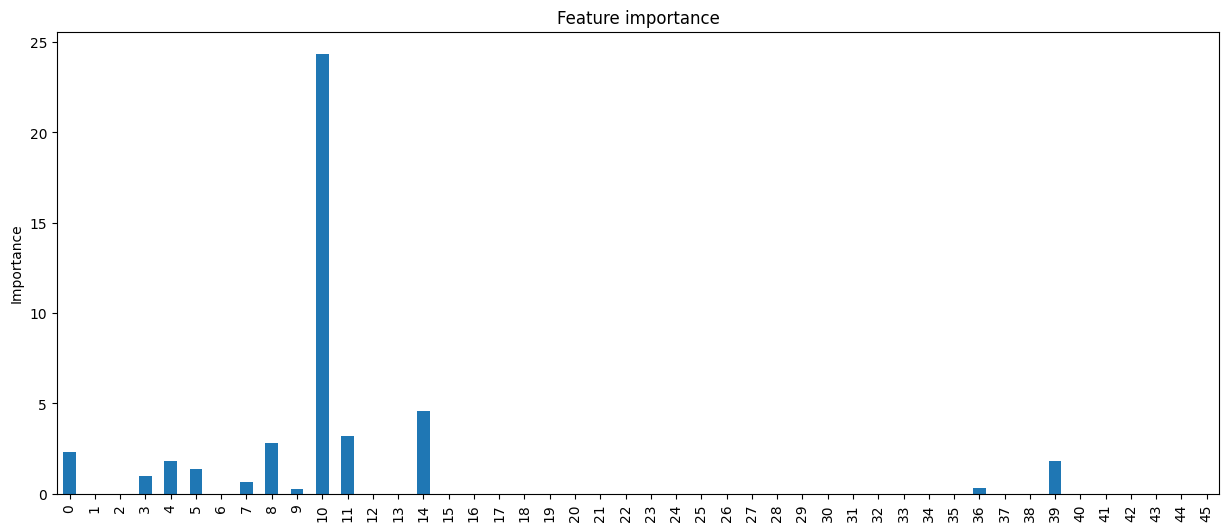

In [31]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_Lasso_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [32]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model_elasticnet_alpha = ElasticNet(alpha = 0.01 + 0.01 , l1_ratio = 0.01/(0.01 + 0.01))
model_elasticnet_alpha.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_elasticnet_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_elasticnet_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.993900114546143
 Testing Accuracy :  0.9941463566475461


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+03, tolerance: 4.060e+02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Importance')

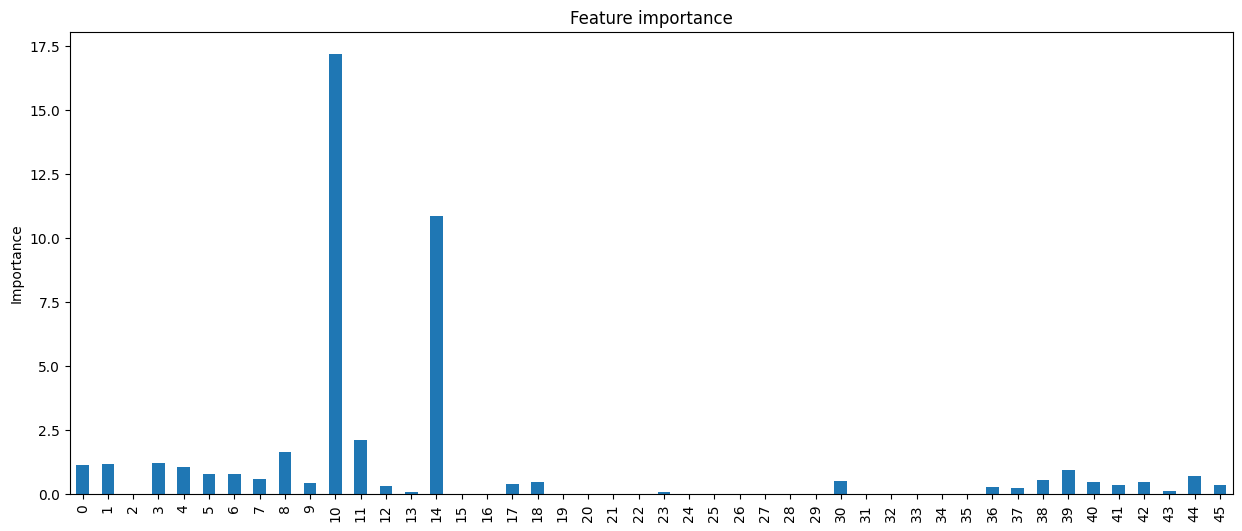

In [33]:
# Let's now plot the feature's importance
# according to the Elastic model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_elasticnet_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [34]:
model_Lasso_large_alpha = Lasso(alpha=0.06, random_state=0)

model_Lasso_large_alpha.fit(Xtrain, Ytrain)
print(" Training Accuracy : " , model_Lasso_large_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_Lasso_large_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.9939831607534855
 Testing Accuracy :  0.9942445336200147


Text(0, 0.5, 'Importance')

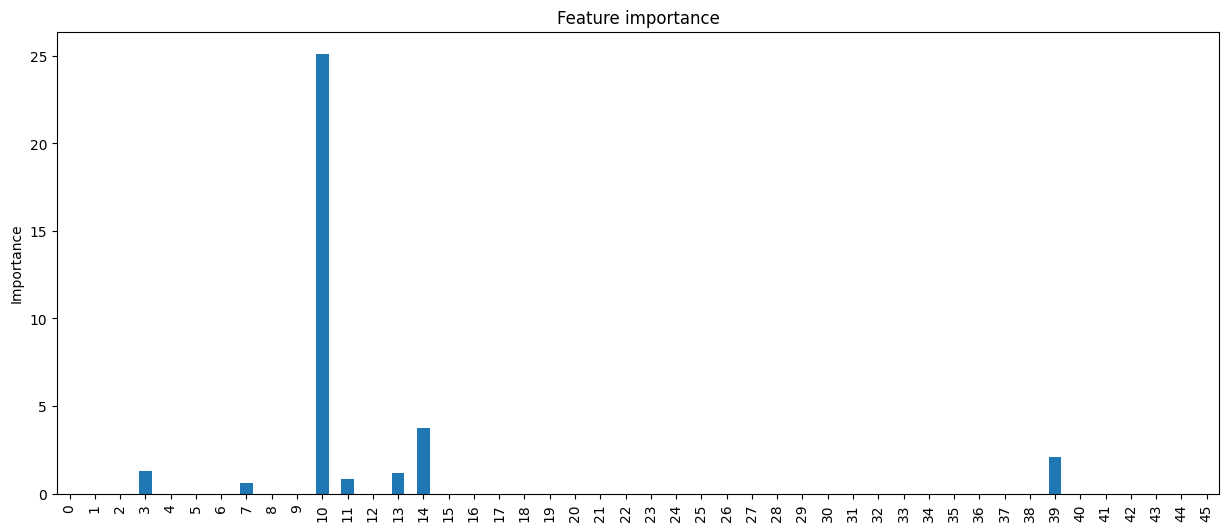

In [35]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_Lasso_large_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")